<a href="https://colab.research.google.com/github/gbnovaes/IA6p/blob/main/Trabalho2%7C2P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras import backend as K
from keras import utils as utls
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout


In [23]:
# Definição de Hiperparâmetros
imageRows, imageCols, cores = 32, 32, 3
batchSize = 64
numClasses = 10
epochs = 5

In [4]:
# Carrega o dataset CIFAR-10
(XTreino, yTreino), (XTeste, yTeste) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
# Normaliza os dados
XTreino = XTreino / 255.0
XTeste = XTeste / 255.0
yTreino = utls.to_categorical(yTreino, numClasses)
yTeste = utls.to_categorical(yTeste, numClasses)

In [21]:
XTreino.shape

(50000, 32, 32, 3)

In [7]:
inputShape = (imageRows, imageCols, cores)

In [14]:
# Modelo MiniVGG

#first layer
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = inputShape ,padding='same'))
model.add(Activation("relu"))
#second layer
model.add(Conv2D(32, (3,3), padding='same' ))
model.add(Activation('relu'))
#regularization
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

#thirt layer
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))

#fourth layer
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
model.add(Dropout(0.25))

#classification layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(numClasses))
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
minhaLeNetModel = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 312s 395ms/step - accuracy: 0.3434 - loss: 1.7696 - val_accuracy: 0.5905 - val_loss: 1.1417
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 313s 385ms/step - accuracy: 0.5901 - loss: 1.1462 - val_accuracy: 0.6673 - val_loss: 0.9347
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 383ms/step - accuracy: 0.6666 - loss: 0.9525 - val_accuracy: 0.7095 - val_loss: 0.8277
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 328s 391ms/step - accuracy: 0.7028 - loss: 0.8392 - val_accuracy: 0.7223 - val_loss: 0.7850
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 317s 385ms/step - accuracy: 0.7287 - loss: 0.7656 - val_accuracy: 0.7453 - val_loss: 0.7292


In [17]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step
              precision    recall  f1-score   support

       avião       0.70      0.84      0.76      1000
       carro       0.90      0.85      0.88      1000
     pássaro       0.63      0.61      0.62      1000
        gato       0.59      0.53      0.56      1000
       cervo       0.75      0.61      0.67      1000
    cachorro       0.67      0.62      0.65      1000
        sapo       0.69      0.90      0.78      1000
      cavalo       0.84      0.78      0.81      1000
       navio       0.86      0.86      0.86      1000
    caminhão       0.84      0.84      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



Text(0, 0.5, 'Acurácia')

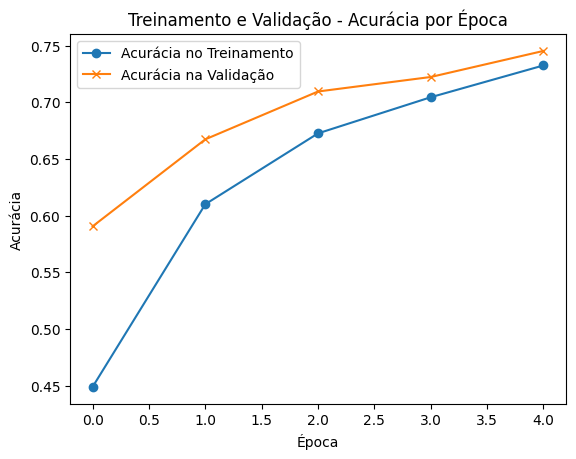

In [18]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['accuracy'], 'o-')
ax.plot(minhaLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')